<a href="https://colab.research.google.com/github/Sourabh9468/new_repo/blob/master/Drone_classification_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
duration = 5  # seconds
sampling_rate = 1000  # Hz
time = np.linspace(0, duration, duration * sampling_rate)


def generate_signal(frequency, amplitude, noise_level=0.1):
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    noise = noise_level * np.random.normal(size=time.shape)
    return signal + noise


def generate_drone_signal():
    base_frequency = 50
    modulated_frequency = 200
    signal_body = generate_signal(base_frequency, amplitude=1.0, noise_level=0.2)
    signal_propeller = generate_signal(modulated_frequency, amplitude=0.5, noise_level=0.2)
    return signal_body + signal_propeller


def generate_bird_signal():
    wing_beat_frequency = 10
    signal_body = generate_signal(wing_beat_frequency, amplitude=1.0, noise_level=0.3)
    return signal_body


def generate_dataset(num_samples=100):
    data = []
    labels = []
    for _ in range(num_samples // 2):

        drone_signal = generate_drone_signal()
        data.append(drone_signal)
        labels.append(1)

        # Generate bird data
        bird_signal = generate_bird_signal()
        data.append(bird_signal)
        labels.append(0)

    return np.array(data), np.array(labels)


data, labels = generate_dataset(200)
df = pd.DataFrame(data)
df['label'] = labels
df.to_csv('synthetic_micro_doppler_dataset.csv', index=False)
print("Synthetic dataset generated and saved as 'synthetic_micro_doppler_dataset.csv'.")

Synthetic dataset generated and saved as 'synthetic_micro_doppler_dataset.csv'.


In [2]:
!pip install tensorflow

In [15]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# df = pd.read_csv("synthetic_micro_doppler_dataset.csv")


# print(df.head())
# print(df.shape)


# X = df.drop(columns=['label'])
# y = df['label']


# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# # X = np.expand_dims(X, axis=2)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset_path = "synthetic_micro_doppler_dataset.csv"
df = pd.read_csv(dataset_path)

# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except 'label'
y = df['label'].values      # Target labels

# Standardization (avoid data leakage)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99)

# Define a more robust neural network
model = models.Sequential([
layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(256, activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(128, activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc:.4f}')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.4728 - val_accuracy: 0.5000 - val_loss: 1.0616
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 1.7059 - val_accuracy: 0.5000 - val_loss: 1.2333
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0000e+00 - loss: 1.8686 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 0.1261 - val_accuracy: 1.0000 - val_loss: 0.0950
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0639 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 1.0000 - val_loss: 5.5288e-04
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 7.9519e-05
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.2777 - val_accuracy: 1.0000 - val_loss: 1.

In [19]:

model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 4998, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 2499, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 2497, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 1248, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 79872)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       5,111,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,118,273 (19.52 MB)

 Trainable params: 5,118,273 (19.52 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - binary_accuracy: 0.9435 - loss: 1.3727 - val_binary_accuracy: 1.0000 - val_loss: 2.6085e-08
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 2.1125e-08 - val_binary_accuracy: 1.0000 - val_loss: 8.6546e-09
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 1.0000 - loss: 7.1341e-09 - val_binary_accuracy: 1.0000 - val_loss: 4.1700e-09
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 1.0000 - loss: 4.4111e-09 - val_binary_accuracy: 1.0000 - val_loss: 2.5587e-09
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 1.0000 - loss: 2.7470e-09 - val_binary_accuracy: 1.0000 - val_loss: 1.7494e-09
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 1.0000 - loss: 2.1363e-09 - val_binary_accuracy: 1.0000 - val_loss: 1.3013e-09
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 1.0000 - loss: 1.3310e-09 - val_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 3.0640e-23 
Test Accuracy: 1.0000


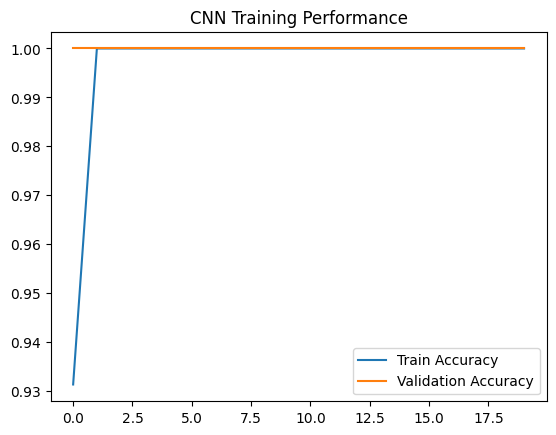

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Training Performance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
duration = 5
sampling_rate = 1000
time = np.linspace(0, duration, duration * sampling_rate)
# drawn from a SIH project in github
def generate_signal(frequency, amplitude, noise_level=0.1):
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    noise = noise_level * np.random.normal(size=time.shape)
    return signal + noise


def generate_drone_signal():
    base_frequency = 50  # Hz for the body movement
    modulated_frequency = 200  # Hz for propeller blades
    signal_body = generate_signal(base_frequency, amplitude=1.0, noise_level=0.2)
    signal_propeller = generate_signal(modulated_frequency, amplitude=0.5, noise_level=0.2)
    return signal_body + signal_propeller

# Generate bird signals (e.g., wing beats)
def generate_bird_signal():
    wing_beat_frequency = 10  # Hz for wing beats
    signal_body = generate_signal(wing_beat_frequency, amplitude=1.0, noise_level=0.3)
    return signal_body

# Generate random test data
def generate_random_test_data(num_samples=10):
    data = []
    labels = []
    for _ in range(num_samples):
        # Randomly choose between generating a drone or bird signal
        if np.random.choice([0, 1]) == 1:
            signal = generate_drone_signal()
            label = 1  # Drone
        else:
            signal = generate_bird_signal()
            label = 0  # Bird

        data.append(signal)
        labels.append(label)

    return np.array(data), np.array(labels)

# Generate and save the test data
def save_test_data(filename='test_micro_doppler_signals.csv', num_samples=10):
    data, labels = generate_random_test_data(num_samples)
    df = pd.DataFrame(data)
    df['label'] = labels
    df.to_csv(filename, index=False, header=False)  # Save without header
    print(f"Test data generated and saved as '{filename}'.")

# Example usage
if __name__ == '__main__':
    save_test_data()

Test data generated and saved as 'test_micro_doppler_signals.csv'.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("test_micro_doppler_signals.csv")

# Check dataset structure
print(df.head())

# Extract features and labels
X = df.drop(columns=['label'])  # Assuming 'label' column contains 'bird' or 'drone'
y = df['label']

# Encode labels (bird = 0, drone = 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for CNN (assuming 1D signal per sample)
X = np.expand_dims(X, axis=2)  # Shape (samples, features, 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   -0.16507034674918483  0.21743298534204447  0.26751642319811636  \
0             -0.060527             0.840974             0.873393   
1             -0.153607             0.125309            -0.286167   
2             -0.127575             0.314153             0.523516   
3             -0.322687            -0.063115             0.450188   
4              0.051692            -0.279564             0.350072   

   0.597953390196914  -0.026309470255873157  0.27183260827987266  \
0           0.611485               0.322825             1.022691   
1           0.327575               0.025755             0.191123   
2           0.089457               0.173837             0.260570   
3           0.657700              -0.130901             0.491715   
4           0.575506              -0.058728             0.167536   

   -0.23509419776660484  0.2780178710943068  0.5996157103657367  \
0              1.066865            1.014293           -0.169982   
1              0.581405            0.25907

KeyError: "['label'] not found in axis"

In [ ]:
# Define CNN Model
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 4998, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2499, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2497, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1248, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 79872)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,111,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,118,273 (19.52 MB)

 Trainable params: 5,118,273 (19.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.6177 - loss: 1.0948 - val_accuracy: 1.0000 - val_loss: 1.6194e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 1.0000 - loss: 1.6263e-04 - val_accuracy: 1.0000 - val_loss: 7.3486e-05
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 1.0000 - loss: 2.7472e-05 - val_accuracy: 1.0000 - val_loss: 1.0215e-06
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - accuracy: 1.0000 - loss: 4.4115e-07 - val_accuracy: 1.0000 - val_loss: 3.4948e-08
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 1.0000 - loss: 1.6102e-08 - val_accuracy: 1.0000 - val_loss: 4.2350e-09
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 1.0000 - loss: 2.1543e-09 - val_accuracy: 1.0000 - val_loss: 1.0666e-09
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 1.0000 - loss: 5.7157e-10 - val_accuracy: 1.0000 - val_loss: 4.3309e-10
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 1.00

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract FP and FN
fp_indices = np.where((y_pred == 1) & (y_test == 0))[0]  # False Positives (Pred: Drone, Actual: Bird)
fn_indices = np.where((y_pred == 0) & (y_test == 1))[0]  # False Negatives (Pred: Bird, Actual: Drone)

print(f"False Positives: {len(fp_indices)} | False Negatives: {len(fn_indices)}")
import matplotlib.pyplot as plt



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
False Positives: 384 | False Negatives: 384


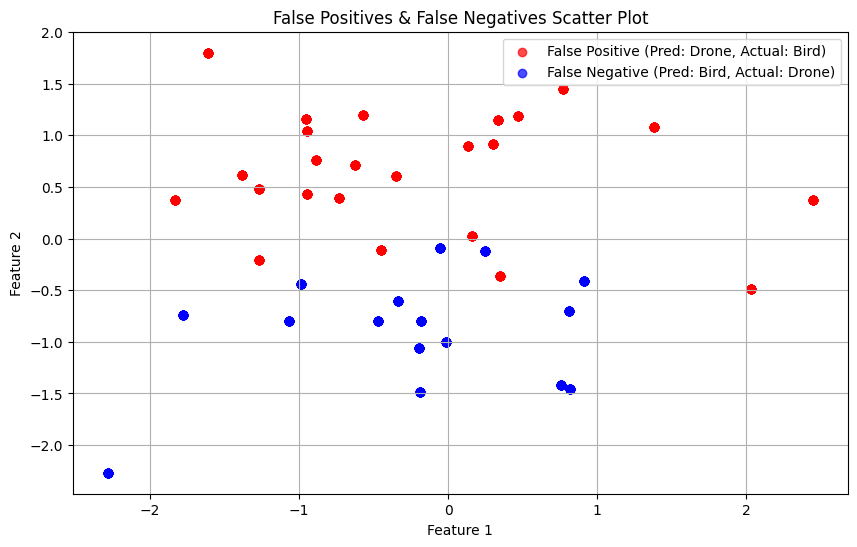

In [ ]:
# Select first two features for visualization
fp_data = X_test[fp_indices, :2]  # First 2 features for plotting
fn_data = X_test[fn_indices, :2]

plt.figure(figsize=(10, 6))

# False Positives
plt.scatter(fp_data[:, 0], fp_data[:, 1], color='red', label="False Positive (Pred: Drone, Actual: Bird)", alpha=0.7)

# False Negatives
plt.scatter(fn_data[:, 0], fn_data[:, 1], color='blue', label="False Negative (Pred: Bird, Actual: Drone)", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("False Positives & False Negatives Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()

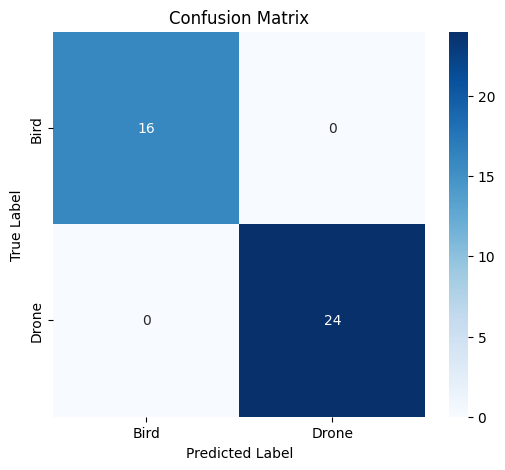

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bird', 'Drone'], yticklabels=['Bird', 'Drone'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


my **test**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset_path = "synthetic_micro_doppler_dataset.csv"
df = pd.read_csv(dataset_path)

# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except 'label'
y = df['label'].values      # Target labels

# Standardization (avoid data leakage)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Stratified K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kfold.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Define a more robust neural network
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {val_acc:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - accuracy: 0.8836 - loss: 0.2740 - val_accuracy: 1.0000 - val_loss: 1.1129e-08
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 1.0153e-12
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.1025e-13
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.9265e-13
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 7.6904e-04 - val_accuracy: 1.0000 - val_loss: 8.7659e-13
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 4.7226e-12
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.0258e-11
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 2.5398e-04 - val